# Business Statement

- Problem solved
    - Hypothesis: non-fraud behavior does not change across time (data has consistent spacial & temporal features)
        - Consistency score as a feature?
 
- Prediction of fraud + the reason for fraud
    - Traditional models (interpretability) vs black-box models

- Current Challenges


# EDA (Data Understanding):

In [2]:
pip install -U imbalanced-learn

  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.7.0
    Uninstalling imbalanced-learn-0.7.0:
      Successfully uninstalled imbalanced-learn-0.7.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report

#import scikeras
#from scikeras.wrappers import KerasClassifier, KerasRegressor

In [3]:
baf_base = pd.read_csv('/Users\hacampbell\Desktop\Flatiron\AI Class\Base.csv')
baf_base.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,0,500,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,0,1500,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,0,200,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,1,200,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,0,1500,0,INTERNET,3.775225,macintosh,1,1,0,7


In [4]:
baf_base.info()
#max(baf_base["device_fraud_count"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [5]:
# Create a deep copy of the DataFrame
new_df = baf_base.copy()

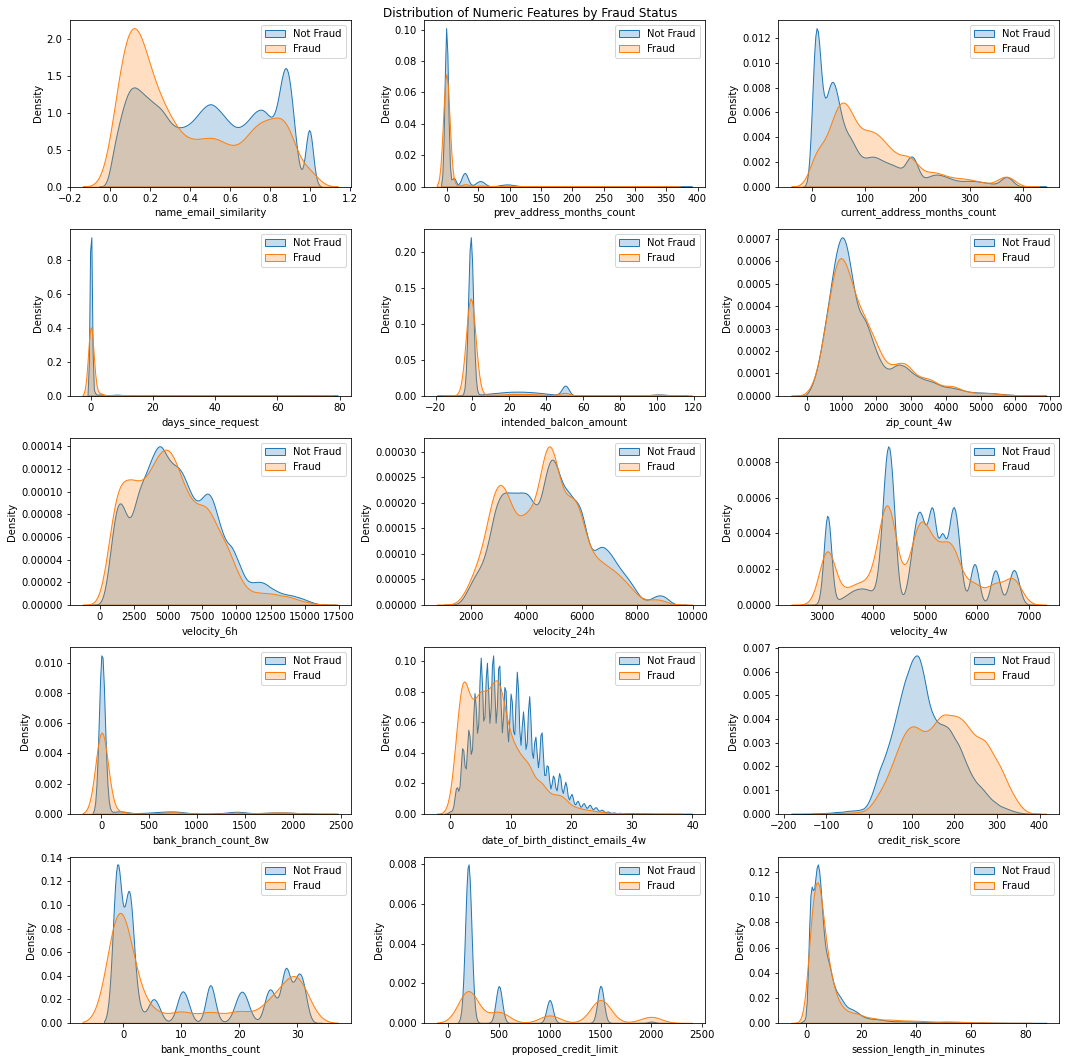

In [6]:
# Create a list of numeric features in the DataFrame df
numeric_features = [x for x in baf_base.columns if baf_base[x].nunique() >= 10]

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

# Title
fig.suptitle('Distribution of Numeric Features by Fraud Status')

# Loop through the numeric features and plot a kernel density plot for each feature
for i, feature in enumerate(numeric_features):
    ax = axes[i // 3][i % 3]
    sns.kdeplot(data=baf_base[baf_base['fraud_bool'] == 0][feature], fill=True, ax=ax, label='Not Fraud')
    sns.kdeplot(data=baf_base[baf_base['fraud_bool'] == 1][feature], fill=True, ax=ax, label='Fraud')
    ax.set_xlabel(feature)
    ax.legend()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Density')

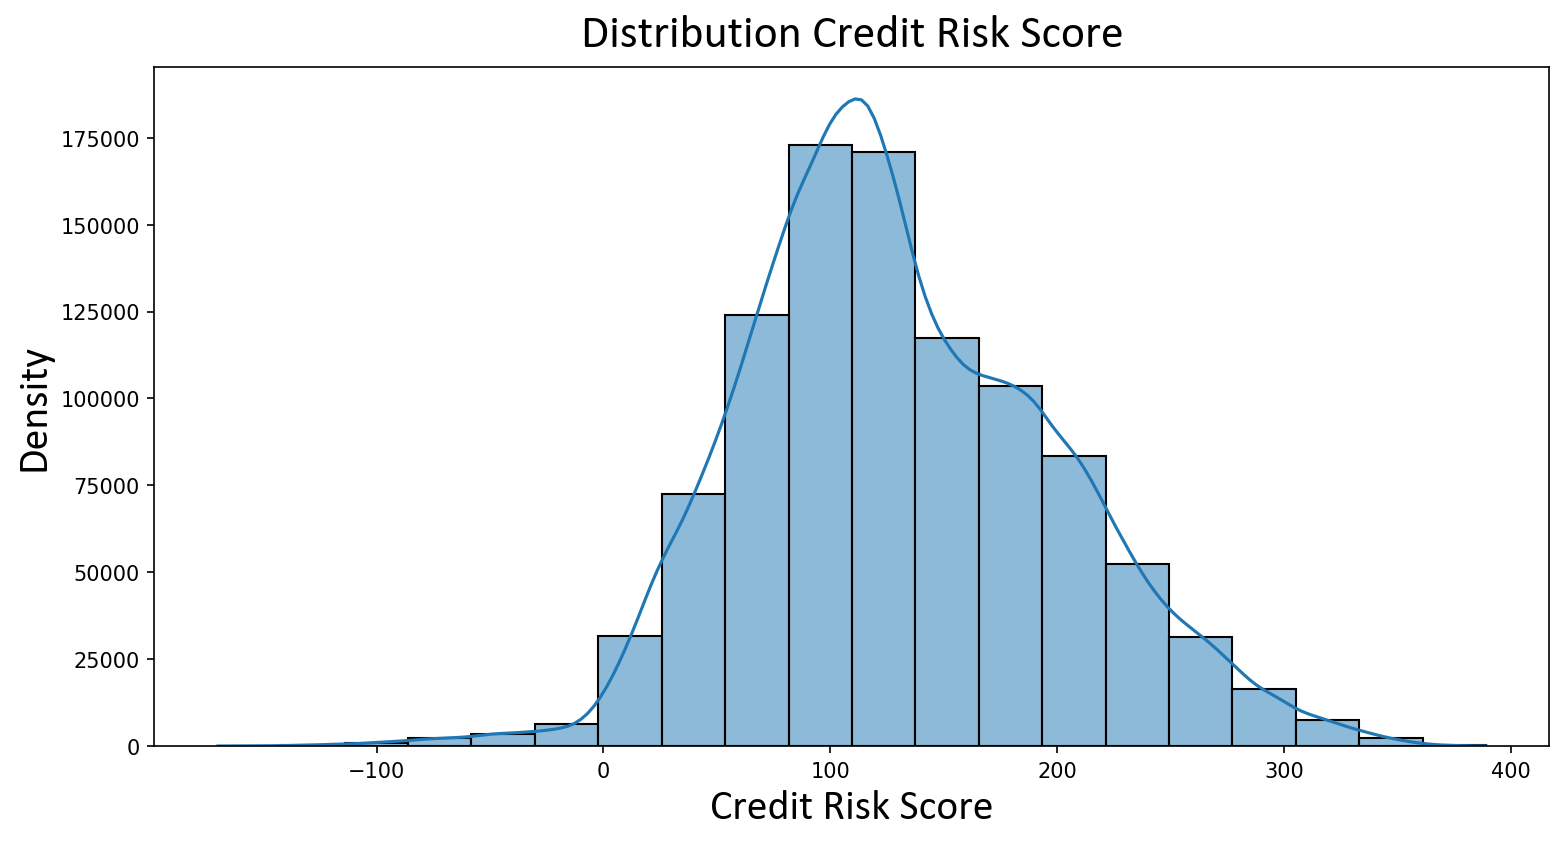

In [7]:
# Creating histogram with the numerical features
title_font = {'fontname':'Calibri', 'size':'22', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} 
label_font = {'fontname':'Calibri', 'size':'20', 'weight':'normal'}
#Visualizing Income using Histogram
# Problem with Income is its not actually a numeric column to begin with

fig, ax = plt.subplots(figsize = (12, 6), dpi = 150)

sns.histplot(baf_base['credit_risk_score'], bins = 20, kde = True, ax = ax)
ax.set_title('Distribution Credit Risk Score', title_font)
ax.set_xlabel('Credit Risk Score', label_font)
ax.set_ylabel('Density', label_font)

Text(0, 0.5, 'Density')

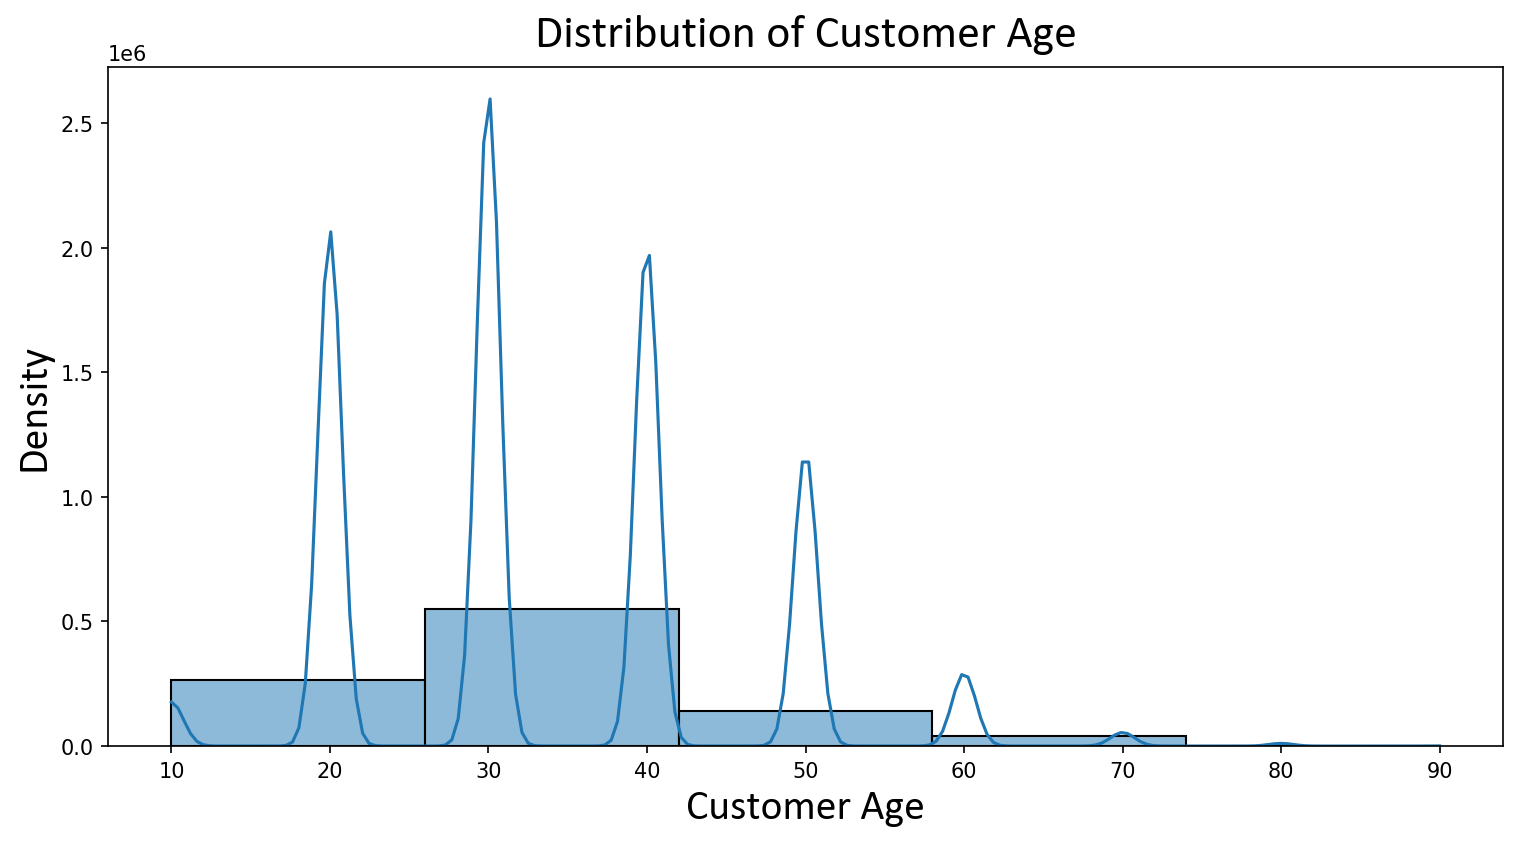

In [8]:

title_font = {'fontname':'Calibri', 'size':'22', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} 
label_font = {'fontname':'Calibri', 'size':'20', 'weight':'normal'}
fig, ax = plt.subplots(figsize = (12, 6), dpi = 150)

sns.histplot(baf_base['customer_age'], bins = 5, kde = True, ax = ax)
ax.set_title('Distribution of Customer Age', title_font)
ax.set_xlabel('Customer Age', label_font)
ax.set_ylabel('Density', label_font)

Text(0, 0.5, 'Density')

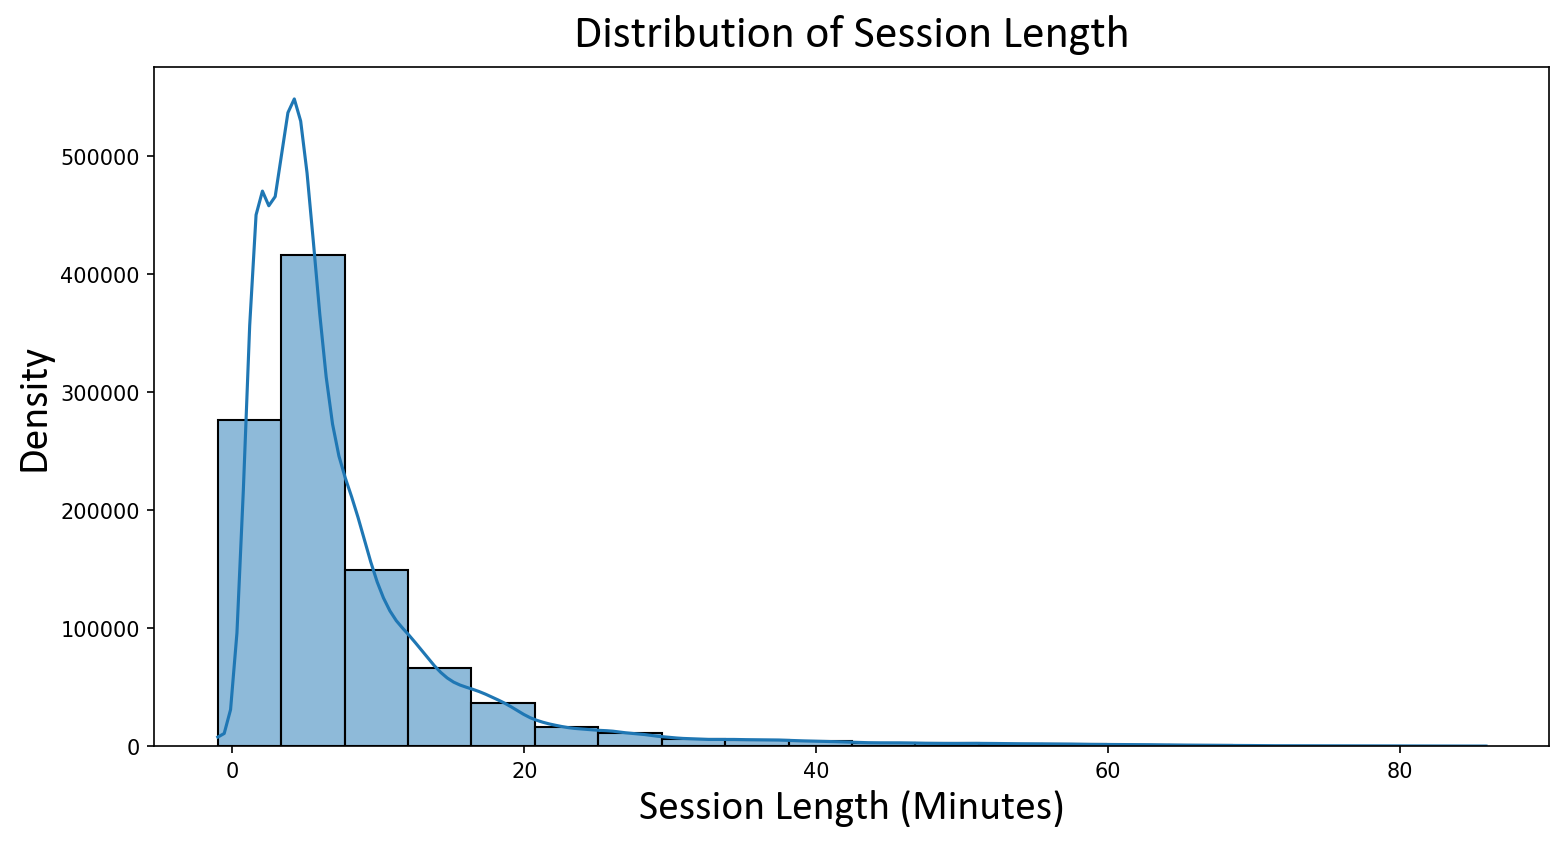

In [9]:
# Session Length in Minutes
fig, ax = plt.subplots(figsize = (12, 6), dpi = 150)

sns.histplot(baf_base['session_length_in_minutes'], bins = 20, kde = True, ax = ax)
ax.set_title('Distribution of Session Length', title_font)
ax.set_xlabel('Session Length (Minutes)', label_font)
ax.set_ylabel('Density', label_font)

Text(0, 0.5, 'Density')

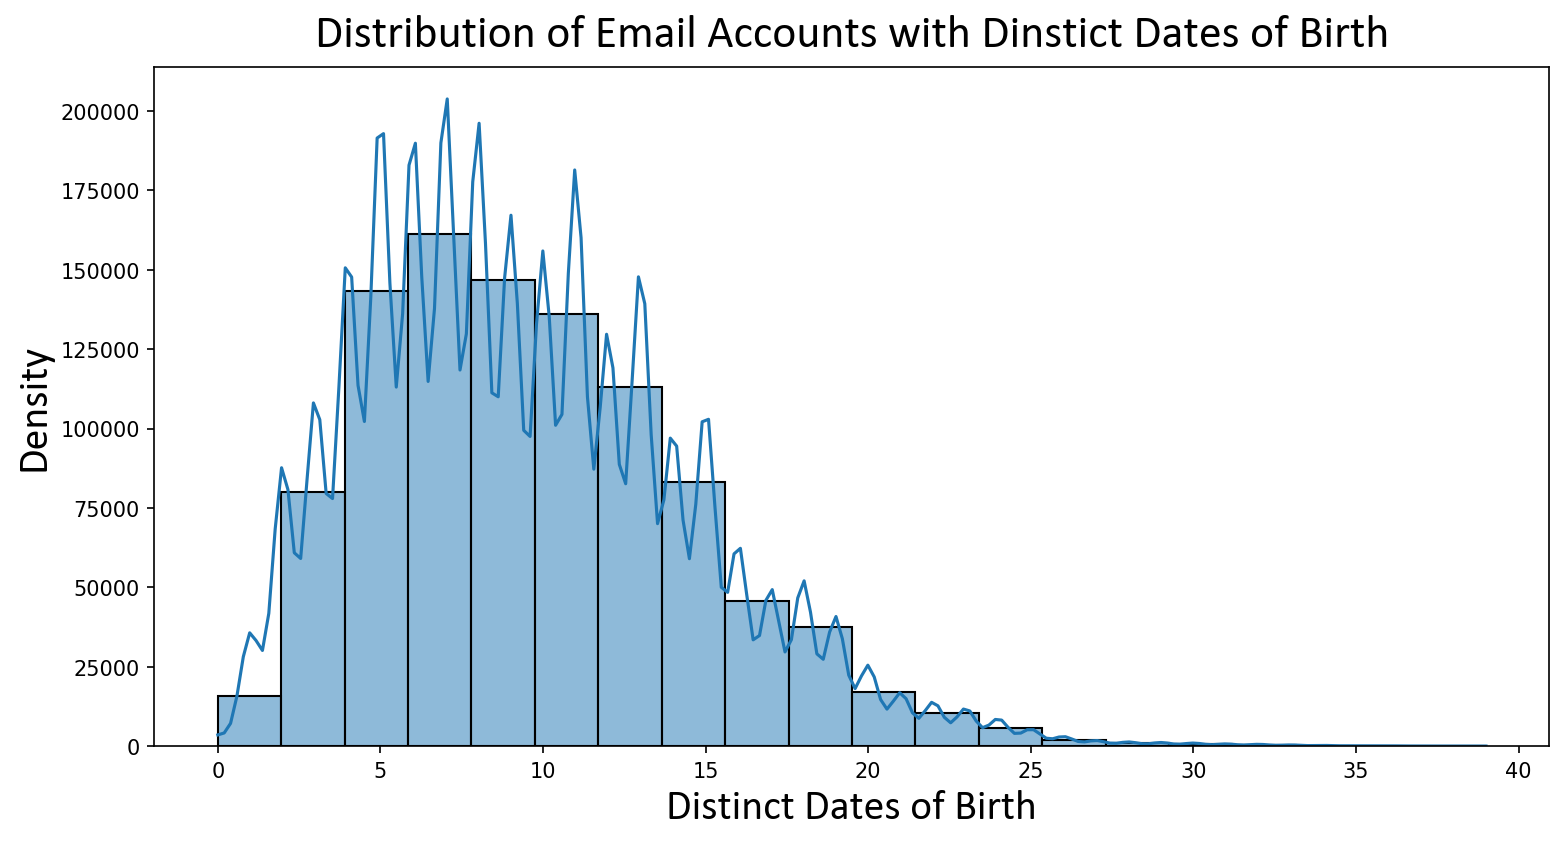

In [10]:
fig, ax = plt.subplots(figsize = (12, 6), dpi = 150)

sns.histplot(baf_base['date_of_birth_distinct_emails_4w'], bins = 20, kde = True, ax = ax)
ax.set_title('Distribution of Email Accounts with Dinstict Dates of Birth', title_font)
ax.set_xlabel('Distinct Dates of Birth', label_font)
ax.set_ylabel('Density', label_font)

<AxesSubplot:>

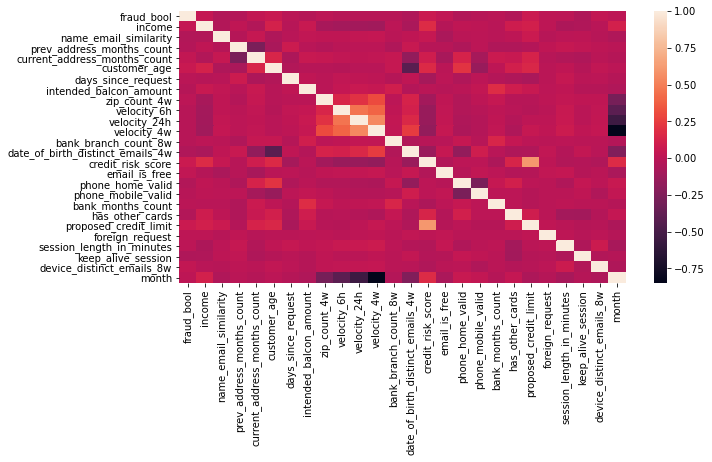

In [35]:
fig, ax = plt.subplots(figsize = (10, 5))
num_df = baf_base.select_dtypes('number').drop('device_fraud_count', axis = 1)
sns.heatmap(num_df.corr(), annot_kws={"fontsize":35})


array([[<AxesSubplot:title={'center':'name_email_similarity'}>,
        <AxesSubplot:title={'center':'prev_address_months_count'}>,
        <AxesSubplot:title={'center':'current_address_months_count'}>,
        <AxesSubplot:title={'center':'days_since_request'}>],
       [<AxesSubplot:title={'center':'intended_balcon_amount'}>,
        <AxesSubplot:title={'center':'zip_count_4w'}>,
        <AxesSubplot:title={'center':'velocity_6h'}>,
        <AxesSubplot:title={'center':'velocity_24h'}>],
       [<AxesSubplot:title={'center':'velocity_4w'}>,
        <AxesSubplot:title={'center':'bank_branch_count_8w'}>,
        <AxesSubplot:title={'center':'date_of_birth_distinct_emails_4w'}>,
        <AxesSubplot:title={'center':'credit_risk_score'}>],
       [<AxesSubplot:title={'center':'bank_months_count'}>,
        <AxesSubplot:title={'center':'proposed_credit_limit'}>,
        <AxesSubplot:title={'center':'session_length_in_minutes'}>,
        <AxesSubplot:>]], dtype=object)

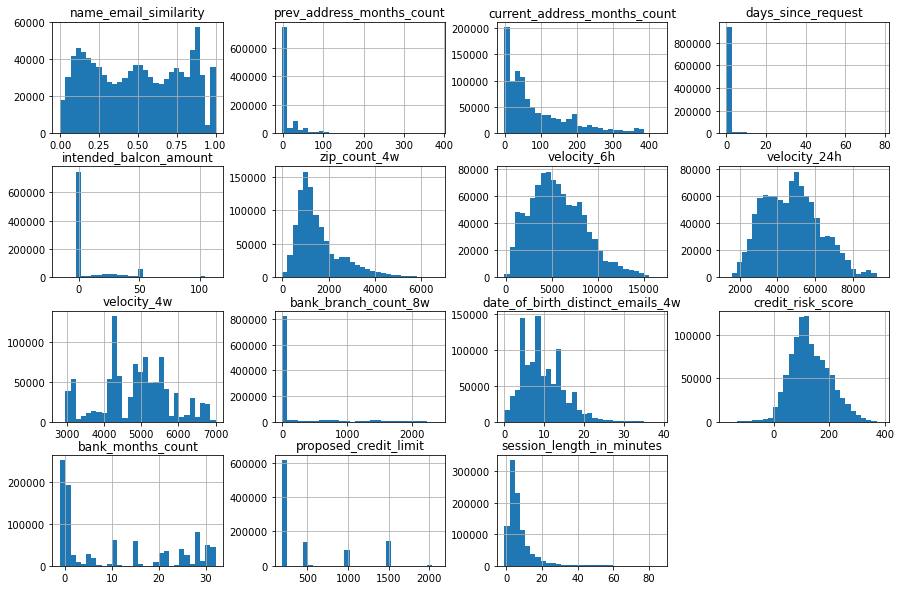

In [21]:
baf_base[numeric_features].hist(bins=30, figsize=(15, 10))

array([[<AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'customer_age'}>,
        <AxesSubplot:title={'center':'date_of_birth_distinct_emails_4w'}>],
       [<AxesSubplot:title={'center':'credit_risk_score'}>,
        <AxesSubplot:title={'center':'has_other_cards'}>,
        <AxesSubplot:title={'center':'proposed_credit_limit'}>],
       [<AxesSubplot:title={'center':'keep_alive_session'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

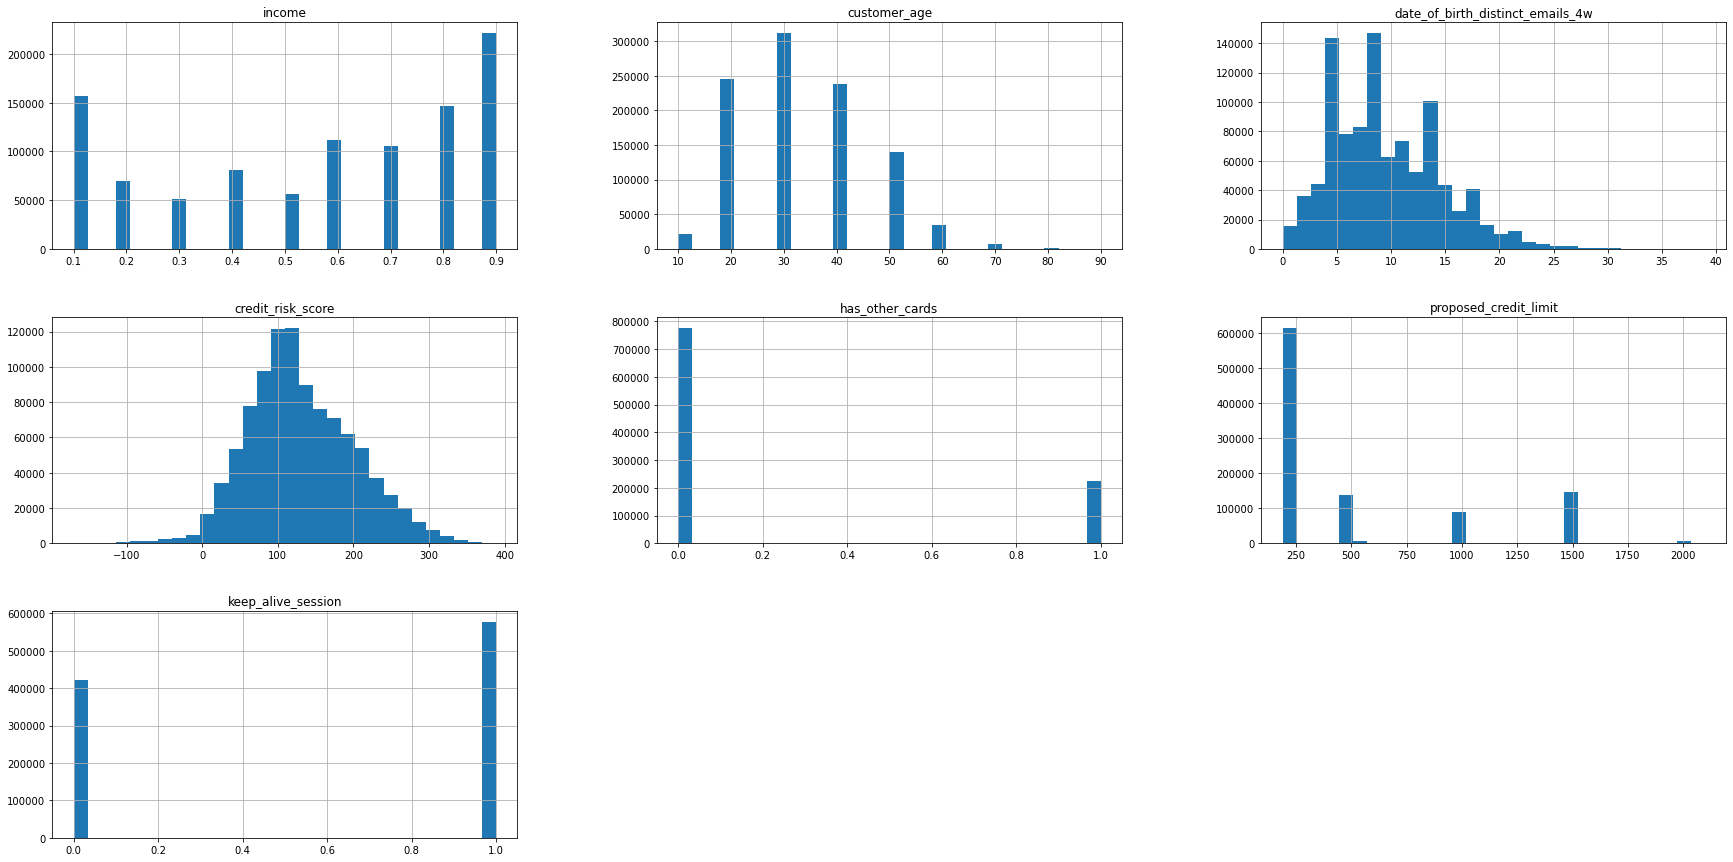

In [28]:
higher_corrs = ['income', 'customer_age', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'has_other_cards', 'proposed_credit_limit', 'keep_alive_session']

baf_base[higher_corrs].hist(bins=30, figsize=(30, 15))

### Data Understanding


In [143]:
# Create a list of categorical features in the DataFrame new_df whose data type is `object`
categorical_features = [x for x in new_df.columns if new_df[x].dtypes == "O"]

print(categorical_features)

['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']


In [144]:
# Convert categorical variables into dummy variables using one-hot encoding
new_df = pd.DataFrame(pd.get_dummies(new_df, prefix=categorical_features))

In [145]:
# Separate the feature matrix and target variable
X = new_df.drop(['fraud_bool'], axis=1)
y = new_df['fraud_bool']

In [ ]:
from imblearn.over_sampling import SMOTE
num_df = baf_base.select_dtypes('number').drop('fraud_bool', axis = 1)
 
#Scale Numeric Variables
scaler = StandardScaler()
num_df_std = pd.DataFrame(scaler.fit_transform(num_df), columns = num_df.columns)
baf_processed = pd.concat([num_df_std, cat_df], axis = 1)

In [ ]:
### 

In [120]:
#Categorical Columns
cat_cols = baf_base.select_dtypes('object')
 
#Look into each
cat_cols['payment_type'].value_counts()
cat_cols['employment_status'].value_counts()
cat_cols['housing_status'].value_counts()
cat_cols['source'].value_counts()
cat_cols['device_os'].value_counts()
 
cat_df = pd.get_dummies(cat_cols)


In [121]:
from imblearn.over_sampling import SMOTE
num_df = baf_base.select_dtypes('number').drop('fraud_bool', axis = 1)
 
#Scale Numeric Variables
scaler = StandardScaler()
num_df_std = pd.DataFrame(scaler.fit_transform(num_df), columns = num_df.columns)
baf_processed = pd.concat([num_df_std, cat_df], axis = 1)

y = baf_base['fraud_bool']

X = baf_processed
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

smo = SMOTE()
 
X_train_smo, y_train_smo = smo.fit_resample(X_train, y_train)

y_train_smo.value_counts()

1    692265
0    692265
Name: fraud_bool, dtype: int64

In [126]:
cat_names = list(cat_df.columns)
higher_corrs = ['income', 'customer_age', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'has_other_cards', 'proposed_credit_limit', 'keep_alive_session']
 
X_train_smo = X_train_smo[cat_names + higher_corrs]
X_train_smo
X_test = X_test[cat_names+higher_corrs]

In [127]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# Fit the model to training data
model_log = logreg.fit(X_train_smo, y_train_smo)


In [128]:
X_test

,payment_type_AA,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CA,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,...,device_os_other,device_os_windows,device_os_x11,income,customer_age,date_of_birth_distinct_emails_4w,credit_risk_score,has_other_cards,proposed_credit_limit,keep_alive_session
901882,0,1,0,0,0,1,0,0,0,0,...,0,0,0,-1.249199,0.524782,-0.100033,0.416327,-0.535706,-0.647820,-1.167806
103172,0,0,1,0,0,0,0,0,0,0,...,1,0,0,-1.593620,-0.306764,0.098625,1.062120,1.866694,-0.647820,0.856307
297932,0,1,0,0,0,0,1,0,0,0,...,1,0,0,-1.593620,0.524782,-0.696005,-0.717398,-0.535706,-0.647820,-1.167806
590891,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0.817326,-1.969856,-0.497348,1.621807,-0.535706,0.993005,0.856307
183492,1,0,0,0,0,1,0,0,0,0,...,1,0,0,1.161747,-1.138310,0.893255,0.344572,-0.535706,-0.032511,0.856307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309789,0,1,0,0,0,0,1,0,0,0,...,0,1,0,-0.215937,0.524782,-0.894663,-1.434946,-0.535706,-0.647820,0.856307
506801,0,0,0,1,0,1,0,0,0,0,...,0,0,0,-1.249199,-1.138310,-0.497348,-0.889610,-0.535706,-0.647820,-1.167806
731645,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0.817326,-1.138310,1.886542,1.535701,1.866694,2.018520,-1.167806
616951,0,0,1,0,0,1,0,0,0,0,...,0,1,0,1.161747,-1.138310,-0.100033,0.158010,-0.535706,0.993005,-1.167806


In [134]:
# Predict on test set
y_test = logreg.predict(X_test)
y_test_pred = logreg.predict_proba(X_test)[:,1]


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [132]:
accuracy = accuracy_score(y_test, y_test_pred)

precision = precision_score(y_test, y_test_pred)

recall = recall_score(y_test, y_test_pred)

f1 = f1_score(y_test, y_test_pred)
 
print(f'Accuracy: {accuracy:.2f}')

print(f'Precision: {precision:.2f}')

print(f'Recall: {recall:.2f}')

print(f'F1 Score: {f1:.2f}')

print('Confusion Matrix:')
 
 
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=logreg.classes_)

disp.plot(cmap=plt.cm.Blues)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
# Import roc_curve, auc
from sklearn.metrics import roc_curve, auc

# Calculate the probability scores of each point in the training set
y_train_score = model_log.decision_function(X_train)

# Calculate the fpr, tpr, and thresholds for the training set
train_fpr, train_tpr, thresholds = roc_curve(y_hat_test, y_hat_test_prob)

# Calculate the probability scores of each point in the test set
y_test_score = model_log.decision_function(X_test)

# Calculate the fpr, tpr, and thresholds for the test set
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)

Training AUC: 1.0


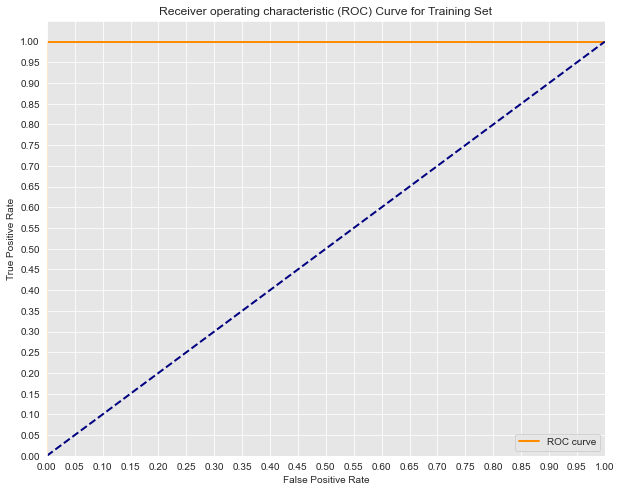

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# ROC curve for training set
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(train_fpr, train_tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training Set')
plt.legend(loc='lower right')
print('Training AUC: {}'.format(auc(train_fpr, train_tpr)))
plt.show()

In [103]:
# Calculate accuracy 
acc = accuracy_score(y_test,y_hat_test) * 100
print('Accuracy is :{0}'.format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

NameError: name 'y_pred' is not defined

In [92]:
# confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=classifier.classes_)
disp.plot(cmap=plt.cm.Blues)

NameError: name 'y_pred' is not defined

In [46]:
# Standardizing the data
baf_base_num = baf_base.select_dtypes(include=np.number)
y = baf_base_num['fraud_bool']
x = baf_base_num.drop('fraud_bool', axis = 1)
scaler = StandardScaler()
model = scaler.fit(x)
scaled_data = model.transform(x)
x_scaled = pd.DataFrame(scaled_data, columns = x.columns)
num_cat = pd.concat([x_scaled, cat_df], axis =1)
baf_scaled = pd.concat([num_cat, y], axis = 1)

In [47]:
# Smote
smo = SMOTE()
x_smo, y_smo = smo.fit_resample(num_cat,y)

In [38]:
# SMOTE

# Creating train and test sets
cols = baf_scaled.columns.tolist()
cols = cols[1:]
X = baf_scaled[cols]
y = baf_scaled[['fraud_bool']]
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

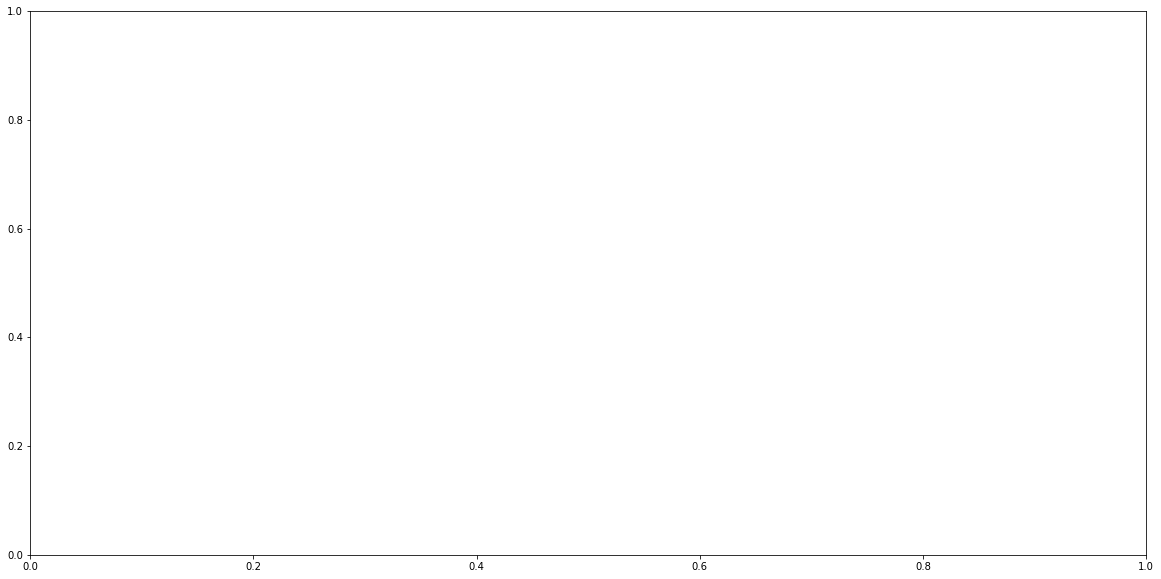

In [53]:
# Correlations between columns
baf_new = pd.concat([x_smo, y_smo], axis =1 )
#x_smo.corr()
fig, ax = plt.subplots(figsize = (20, 10))
#sns.heatmap(baf_new.corr(), annot = True)
corrs = baf_new.corr()[['fraud_bool']]


In [72]:
# Removing the features with correlations below .1
# Looking for columns above .25 for feature selection
corrs[abs(corrs['fraud_bool'])>.2]

# Numeric Columns we want (above +-.2 correlation)
higher_corrs =baf_base[['income', 'customer_age', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'has_other_cards', 'proposed_credit_limit', 'keep_alive_session']]
pd.concat([['']])

In [ ]:
# Creating train and test sets
cols = .columns.tolist()
cols = cols[1:]
X = baf_num[cols]
y = baf_num[['fraud_bool']]
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [81]:
log_reg = sm.Logit(y_train_smo, X_train_smo).fit()
print(log_reg.summary())

C:\Users\hacampbell\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\statsmodels\discrete\discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\hacampbell\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\statsmodels\discrete\discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

In [83]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# Fit the model to training data
model_log = logreg.fit(X_train_smo, y_train_smo)

# Predict on test set
y_hat_test = logreg.predict(X_test)

In [85]:
# Import roc_curve, auc
from sklearn.metrics import roc_curve, auc

# Calculate the probability scores of each point in the training set
y_train_score = model_log.decision_function(X_train)

# Calculate the fpr, tpr, and thresholds for the training set
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)

# Calculate the probability scores of each point in the test set
y_test_score = model_log.decision_function(X_test)

# Calculate the fpr, tpr, and thresholds for the test set
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)

- Current Datasets: Kaggle CC Fraud + Bank Account Fraud
- Distributions, trends, outliers
- Look at Normal (0) vs Fraud (1) class imbalance

# Data Processing

- Nulls
- Apply filters to realize our assumptions
- Standardize variables
- SMOTE to balance target
- Train/Test split


In [9]:
# Look for features with stronger correlations
baf_num = baf_base.select_dtypes(include=('int64', 'float64'))

# Grid Search
classifier = KerasClassifier(build_fn = build_classifier)
param_grid = dict(optimizer = ['Adam'],
                  epochs=[10, 20, 50],
                  batch_size=[16, 25, 32])
grid = GridSearchCV(estimator=classifier, param_grid=param_grid, scoring='accuracy')
grid_result = grid.fit(X_train, y_train)
best_parameters = grid.best_params_
best_accuracy = grid.best_score_


NameError: name 'KerasClassifier' is not defined

# Features

Types:
- Account related features: account number, card exp date, etc.
- Transaction related features: POS number, transaction time, amount, etc.
- Customer related features: customer number, type of customer, etc.

Feature transformation:
- Date/time variables: weekday or weekend
- Customer spending: average spending amount  + number of transactions
- Risk score: average number of fraud over a certain window 

# Baseline Model

- Logistic Regression 
    - Coefficients, statisitcal importance, explainability
- Decision Tree
    - Classification criteria, feature importance

In [ ]:
# Creating train and test sets
cols = baf_num.columns.tolist()
cols = cols[1:]
X = baf_num[cols]
y = baf_num[['fraud_bool']]
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)


In [ ]:
# Logistic Regression
log_reg = sm.Logit(y_train, X_train).fit()
print(log_reg.summary())

In [ ]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# Fit the model to training data
model_log = logreg.fit(, y_train)

# Predict on test set
y_hat_test = logreg.predict(X_test)

In [ ]:
# Import roc_curve, auc
from sklearn.metrics import roc_curve, auc

# Calculate the probability scores of each point in the training set
y_train_score = model_log.decision_function(X_train)

# Calculate the fpr, tpr, and thresholds for the training set
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)

# Calculate the probability scores of each point in the test set
y_test_score = model_log.decision_function(X_test)

# Calculate the fpr, tpr, and thresholds for the test set
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)

In [ ]:
# Train a DT classifier
classifier = DecisionTreeClassifier(random_state=10)  
classifier.fit(X_train, y_train) 

In [ ]:
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=10, splitter='best')

In [ ]:
# Make predictions for test data
y_pred = classifier.predict(X_test)  

# Evaluation

- Metrics: ROC (AUC Score), Recall, Confusion Matrix

In [ ]:
# Calculate accuracy 
acc = accuracy_score(y_test,y_pred) * 100
print('Accuracy is :{0}'.format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

In [ ]:
# confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=classifier.classes_)
disp.plot(cmap=plt.cm.Blues)

In [ ]:
# Identify the optimal tree depth for given data
max_depths = list(range(1, 33))
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=10)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

# Hyperparameter Tuning --> Optimal Model

- Ensemble Methods:
    - Random Forest
    - Boosting

### Visuals for Powerpoint

In [135]:
# Create a new DataFrame showing the count of unique values in the 'fraud_bool' column
fraud_vals = pd.DataFrame(baf_base['fraud_bool'].value_counts())
print(fraud_vals)

   fraud_bool
0      988971
1       11029


In [138]:
# Reset the index of the DataFrame and rename the columns
fraud_vals.reset_index(inplace=True)
fraud_vals.rename(columns={'index': 'fraud_bool', 'fraud_bool': 'count'}, inplace=True)
print(fraud_vals)

   fraud_bool   count
0           0  988971
1           1   11029


In [139]:
# Define custom color palette
my_palette = sns.color_palette("husl", 2)
sns.set_style("whitegrid")

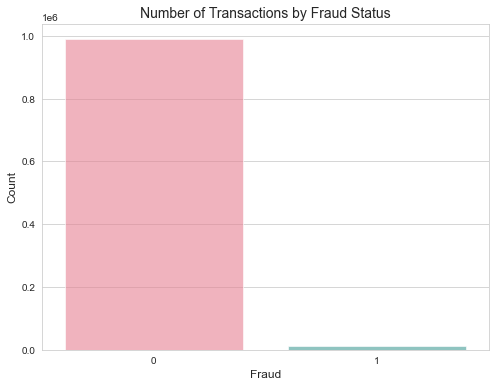

In [140]:
# Set up plot
plt.figure(figsize=(8, 6))

# Create bar plot
sns.barplot(data=fraud_vals, x="fraud_bool", y="count", palette=my_palette, alpha=.6)

# Customize labels and legend
plt.xlabel("Fraud", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Number of Transactions by Fraud Status", fontsize=14)

# Display plot
plt.show()

# Conclusion